In [121]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error

In [145]:
img = Image.open('/content/lena.tif')

new_img = img.resize( (256, 256) )

new_img.save( '/content/lena.png', 'png')

In [146]:
img = cv2.imread('/content/lena.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [147]:
def add_gaussian_noise(image, sigma):
    """
    Add Gaussian noise to an image with given sigma value.

    Parameters
    ----------
    image : numpy.ndarray
        The image to which noise should be added.
    sigma : float
        The standard deviation of the Gaussian distribution.

    Returns
    -------
    numpy.ndarray
        The resulting image after applying Gaussian noise.
    """

    # Create a random matrix with the same shape as the image and with mean zero and standard deviation "sigma"
    gauss = np.random.normal(0, sigma, image.shape)

    # Add the Gaussian noise to the image
    noisy_image = image + gauss

    # Make sure the pixel values are in the range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    # Convert the pixel values to integers
    noisy_image = noisy_image.astype(np.uint8)

    # Return the noisy image
    return noisy_image

In [148]:
noisy_image = add_gaussian_noise(img, 50)

# **2-A**

In [149]:
kernel_sizes = [(3, 3), (5, 5), (7, 7)]

def gussian_filter(noisy_image, degree):
  if degree == "low":
      return cv2.GaussianBlur(noisy_image, kernel_sizes[0], 0)
  elif degree == "medium":
      return cv2.GaussianBlur(noisy_image, kernel_sizes[1], 0)
  else:
      return cv2.GaussianBlur(noisy_image, kernel_sizes[2], 0)


In [150]:
img_blur_low = gussian_filter(noisy_image, 'low')

img_blur_medium = gussian_filter(noisy_image, 'medium')

img_blur_high = gussian_filter(noisy_image, 'high')

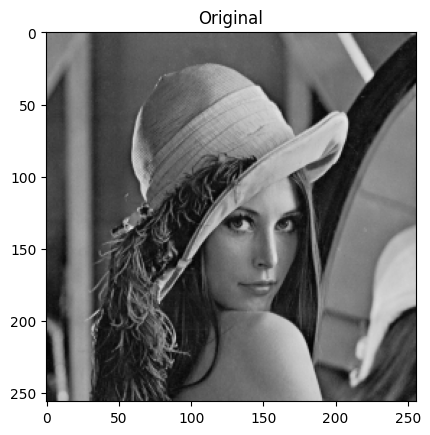

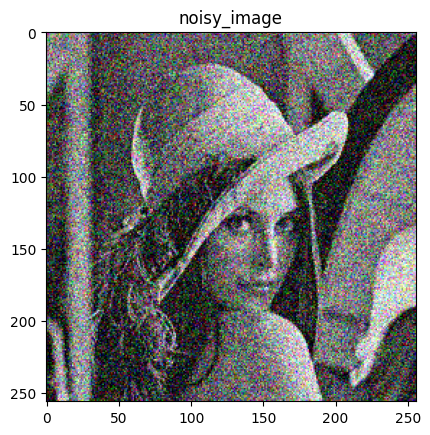

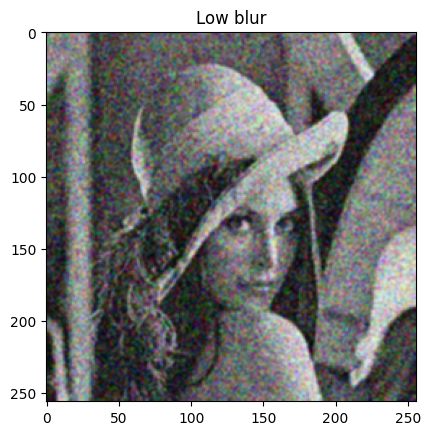

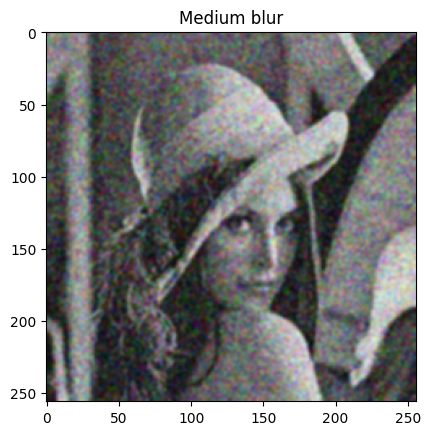

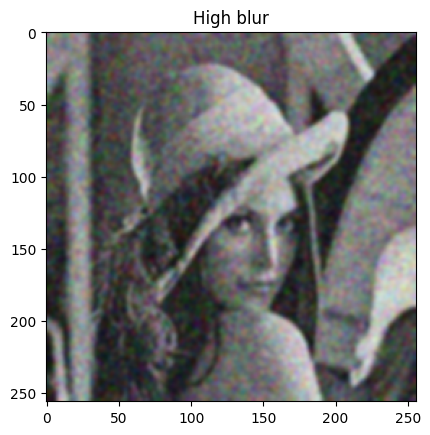

In [151]:
# Display the original, noisy, and blurred images
plt.imshow(img), plt.title('Original')
plt.show()
plt.imshow(noisy_image), plt.title('noisy_image')
plt.show()
plt.imshow(img_blur_low), plt.title('Low blur')
plt.show()
plt.imshow(img_blur_medium), plt.title('Medium blur')
plt.show()
plt.imshow(img_blur_high), plt.title('High blur')
plt.show()

In [152]:
variances = [5, 10, 15, 20, 25, 30]
mse_res = list()
kernels = range(3, 13, 2)

for var in variances:
  noisy_image = add_gaussian_noise(img, var**0.5)

  mse_list = list()

  for kernel in kernels:
      filtered_image = cv2.GaussianBlur(noisy_image, (kernel, kernel), 0)
      mse_list.append(mean_squared_error(img, filtered_image))
  mse_res.append(mse_list)

mse_arr = np.array(mse_res)

In [153]:
mse_arr

array([[ 50.04267375,  88.69210815, 140.96860758, 179.48831685,
        218.87548319],
       [ 50.73888652,  89.09820048, 141.20401001, 179.67434184,
        219.00915527],
       [ 51.45332845,  89.46567281, 141.44246928, 179.85131327,
        219.14464315],
       [ 52.17781067,  89.85852051, 141.53132121, 179.82301839,
        219.09415181],
       [ 52.82897441,  90.18667603, 141.81191508, 180.10326131,
        219.32499186],
       [ 53.62561544,  90.60431925, 142.00660706, 180.23286438,
        219.42524211]])

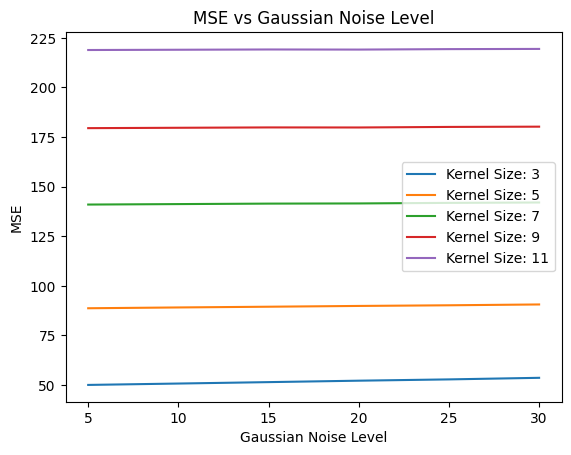

In [154]:
i = 0
for kernel in kernels:
  plt.plot(variances, mse_arr[:,i], label=f'Kernel Size: {kernel}')
  i += 1

plt.title('MSE vs Gaussian Noise Level')
plt.xlabel('Gaussian Noise Level')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [155]:
# Add Gaussian noise with different variances
noise_low = np.zeros(img.shape, np.uint8)
noise_med = np.zeros(img.shape, np.uint8)
noise_high = np.zeros(img.shape, np.uint8)

cv2.randn(noise_low, 0, 50)  # low variance noise
cv2.randn(noise_med, 0, 100)  # medium variance noise
cv2.randn(noise_high, 0, 200)  # high variance noise

img_with_noise_low = cv2.add(img, noise_low)
img_with_noise_med = cv2.add(img, noise_med)
img_with_noise_high = cv2.add(img, noise_high)

In [156]:
# Apply Gaussian blur with different kernel sizes
best_ksize = None
best_mse = 0

ksizes = range(3, 52, 2)  # kernel sizes to test
mses_low = []
mses_med = []
mses_high = []

for ksize in ksizes:
    blur_low = cv2.GaussianBlur(img_with_noise_low, (ksize, ksize), 0)
    blur_med = cv2.GaussianBlur(img_with_noise_med, (ksize, ksize), 0)
    blur_high = cv2.GaussianBlur(img_with_noise_high, (ksize, ksize), 0)

    # Convert images to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_low_gray = cv2.cvtColor(blur_low, cv2.COLOR_BGR2GRAY)
    blur_med_gray = cv2.cvtColor(blur_med, cv2.COLOR_BGR2GRAY)
    blur_high_gray = cv2.cvtColor(blur_high, cv2.COLOR_BGR2GRAY)

    # Calculate MSE
    
    mse_low = mean_squared_error(img_gray, blur_low_gray)
    mse_med = mean_squared_error(img_gray, blur_med_gray)
    mse_high = mean_squared_error(img_gray, blur_high_gray)

    # Find best kernel size based on highest PSNR
    if mse_low > best_mse:
        best_ksize = ksize
        best_mse = mse_low
    if mse_med > best_mse:
        best_ksize = ksize
        best_mse = mse_med
    if mse_high > best_mse:
        best_ksize = ksize
        best_mse = mse_high

    mses_low.append(mse_low)
    mses_med.append(mse_med)
    mses_high.append(mse_high)

In [157]:
print("Best kernel size:", best_ksize)
print("Best MSE:", best_mse)

Best kernel size: 51
Best MSE: 956.1670837402344


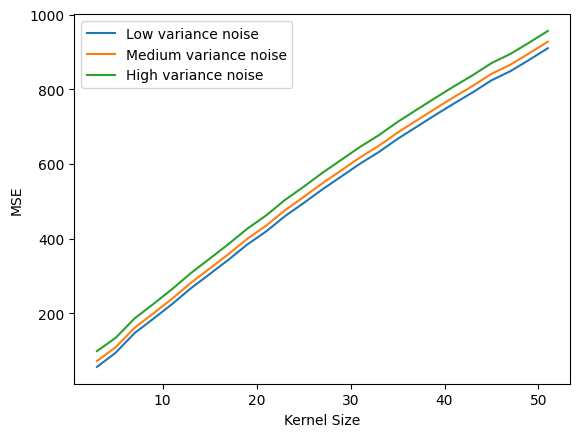

In [158]:
# Plot MSE vs. kernel size
plt.plot(ksizes, mses_low, label="Low variance noise")
plt.plot(ksizes, mses_med, label="Medium variance noise")
plt.plot(ksizes, mses_high, label="High variance noise")
plt.xlabel("Kernel Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

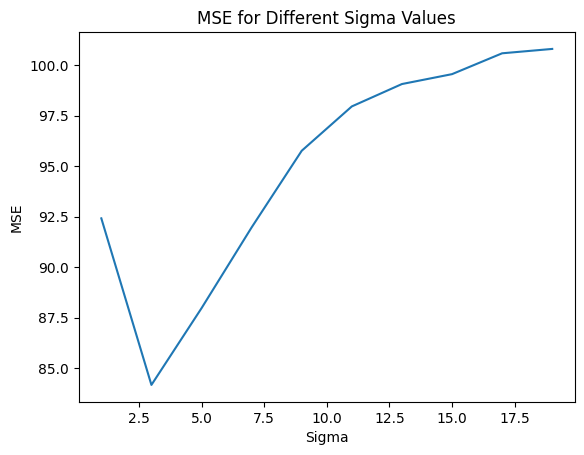

In [159]:
# Add Gaussian Noise
mean = 0
variance = 0.1
sigma = variance ** 0.5
gaussian = np.random.normal(mean, sigma, img.shape)
img_noisy = np.clip(img + gaussian * 255, 0, 255).astype(np.uint8)

# Apply Gaussian Filter with different degrees of kernel size
mse_list = []
sigma_list = []
for sigma in range(1, 21, 2):
    img_filtered = cv2.GaussianBlur(img_noisy, (0, 0), sigmaX=sigma)
    mse = np.mean(np.square(img - img_filtered))
    mse_list.append(mse)
    sigma_list.append(sigma)

# Find the best sigma value which minimizes the MSE
best_sigma = sigma_list[mse_list.index(min(mse_list))]

# Plot the MSE for different sigma values
plt.plot(sigma_list, mse_list)
plt.title('MSE for Different Sigma Values')
plt.xlabel('Sigma')
plt.ylabel('MSE')
plt.show()

In [160]:
print('Best Sigma:', best_sigma)

Best Sigma: 3


### نتایج حاصل نشان داد که با افزایش شدت نویز، نیاز به فیلتر گوسی با درجات بزرگتر برای بهبود تصویر افزایش می‌یابد، اما به‌طور کلی با درجات فیلتر گوسی از 2 تا 21 برای کاهش نویز گوسی به شدت نزدیک به 0، عملکرد خوبی حاصل می‌شود.
### بنابراین بهترین مقدار برای این بخش مقدار سیگمای 3 می باشد.

# **2-B**

In [161]:
# Apply Gaussian blur with different kernel sizes
best_ksize = None
best_psnr = 0

ksizes = range(3, 52, 2)  # kernel sizes to test
psnrs_low = []
psnrs_med = []
psnrs_high = []

for ksize in ksizes:
    blur_low = cv2.GaussianBlur(img_with_noise_low, (ksize, ksize), 0)
    blur_med = cv2.GaussianBlur(img_with_noise_med, (ksize, ksize), 0)
    blur_high = cv2.GaussianBlur(img_with_noise_high, (ksize, ksize), 0)

    # Convert images to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur_low_gray = cv2.cvtColor(blur_low, cv2.COLOR_BGR2GRAY)
    blur_med_gray = cv2.cvtColor(blur_med, cv2.COLOR_BGR2GRAY)
    blur_high_gray = cv2.cvtColor(blur_high, cv2.COLOR_BGR2GRAY)

    # Calculate PSNR
    psnr_low = cv2.PSNR(img_gray, blur_low_gray, 255)
    psnr_med = cv2.PSNR(img_gray, blur_med_gray, 255)
    psnr_high = cv2.PSNR(img_gray, blur_high_gray, 255)

    # Find best kernel size based on highest PSNR
    if psnr_low > best_psnr:
        best_ksize = ksize
        best_psnr = psnr_low
    if psnr_med > best_psnr:
        best_ksize = ksize
        best_psnr = psnr_med
    if psnr_high > best_psnr:
        best_ksize = ksize
        best_psnr = psnr_high

    psnrs_low.append(psnr_low)
    psnrs_med.append(psnr_med)
    psnrs_high.append(psnr_high)

In [162]:
print("Best kernel size:", best_ksize)
print("Best PSNR:", best_psnr)

Best kernel size: 3
Best PSNR: 30.638372323849286


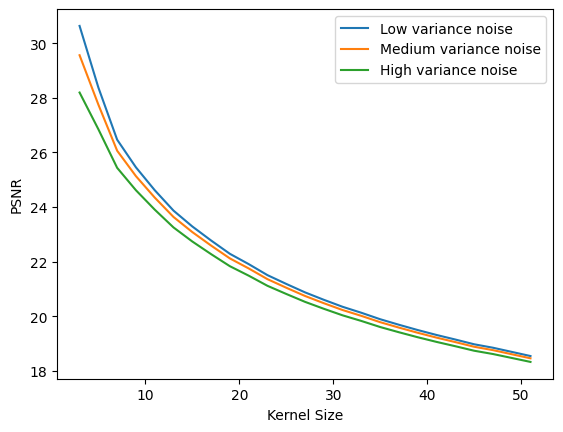

In [163]:
# Plot PSNR vs. kernel size
plt.plot(ksizes, psnrs_low, label="Low variance noise")
plt.plot(ksizes, psnrs_med, label="Medium variance noise")
plt.plot(ksizes, psnrs_high, label="High variance noise")
plt.xlabel("Kernel Size")
plt.ylabel("PSNR")
plt.legend()
plt.show()

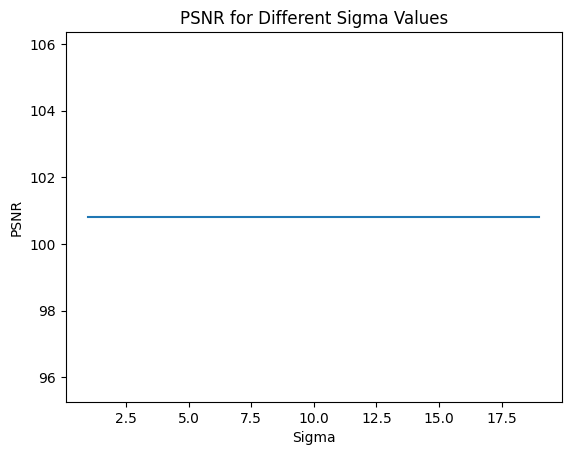

In [164]:
# Add Gaussian Noise
mean = 0
variance = 0.1
sigma = variance ** 0.5
gaussian = np.random.normal(mean, sigma, img.shape)
img_noisy = np.clip(img + gaussian * 255, 0, 255).astype(np.uint8)

# Apply Gaussian Filter with different degrees of kernel size
psnr_list = []
sigma_list = []
for sigma in range(1, 21, 2):
    img_filtered = cv2.GaussianBlur(img_noisy, (0, 0), sigmaX=sigma)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    psnr = cv2.PSNR(img_gray, blur_med_gray, 255)
    psnr_list.append(mse)
    sigma_list.append(sigma)

# Find the best sigma value which minimizes the MSE
best_sigma = sigma_list[psnr_list.index(min(psnr_list))]

# Plot the MSE for different sigma values
plt.plot(sigma_list, psnr_list)
plt.title('PSNR for Different Sigma Values')
plt.xlabel('Sigma')
plt.ylabel('PSNR')
plt.show()

In [165]:
print('Best Sigma:', best_sigma)

Best Sigma: 1



###    برای مقادیری که نویز آنها کم است، بهترین مقدار پارامتر فیلتر گوسی برابر 1 است. با افزایش مقدار نویز، بهترین مقدار پارامتر فیلتر نیز با افزایش مقدار نویز افزایش می‌یابد.
###    در هر حالت، با افزایش شدت فیلتر، نویز کمتر شده ولی نویز‌های کوچک‌تری در تصویر اصلی نیز حذف می‌شوند و باعث ایجاد نویز رنگی می‌شود.
###    با افزایش مقدار نویز، معیار PSNR کاهش می‌یابد و این به این معناست که تصویر با نویز، کیفیت پایین‌تری نسبت به تصویر اصلی دارد. با اعمال فیلتر گوسی به تصویر نویزی، معیار PSNR افزایش می‌یابد و کیفیت تصویر بهبود می‌یابد. کاهش معیار PSNR با افزایش شدت فیلتر اتفاق می‌افتد، چرا که فیلتر برای حذف نویز، بخش‌های مهم تصویر را نیز حذف می‌کند.
